## Check HDF5 File
Utility notebook used when make_plots.py isn't working as expected.<br>
Open an HDF5 output of workflows/SUEP_coffea.py and check out its contents.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def h5load(ifile, label):
    #try:
    with pd.HDFStore(ifile, 'r') as store:
        try:
            data = store[label] 
            metadata = store.get_storer(label).attrs.metadata
            return data, metadata

        except KeyError:
            print("No key",label,ifile)
            return 0, 0
    # except:
    #     print("Some error occurred", ifile)
    #     return 0, 0

In [6]:
f = '/work/submit/lavezzo/SUEP/jetIDv2/QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM/93FAFB18-7436-B843-B875-63C078504ADF.hdf5'
data, m = h5load(f,'ch')
event_vars, m = h5load(f,'vars')

In [7]:
jets = event_vars['ngood_fastjets'][data['event_index_ch']]
htloose = event_vars['ht_loose'][data['event_index_ch']]
httight = event_vars['ht_tight'][data['event_index_ch']]

(array([41577.,     0.,     0.,     0.,     0.,  3529.,     0.,     0.,
            0.,   110.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 10 artists>)

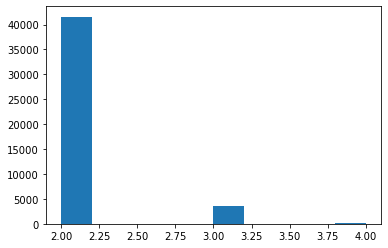

In [8]:
plt.hist(jets)

107915952.921875
107785752.125


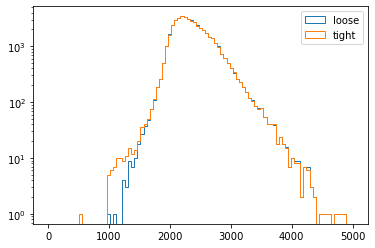

In [9]:
plt.hist(htloose, bins=np.linspace(0,5000,100),  histtype='step', label='loose')
plt.hist(httight, bins=np.linspace(0,5000,100), histtype='step', label='tight')
plt.yscale('log')
plt.legend()
print(np.sum(htloose))
print(np.sum(httight))